In [1]:
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()

import sys
import os

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# Setting path to load util functions
from pathlib import Path
parent_dir = Path.cwd().parents[1]
sys.path.append(os.path.abspath(parent_dir))

In [3]:
train_df = pd.read_parquet('../../data/final_features_ml/train_all_features_last_month.parquet')
val_df = pd.read_parquet('../../data/final_features_ml/val_all_features_last_month.parquet')
test_df = pd.read_parquet('../../data/final_features_ml/test_all_features_last_month.parquet')

In [4]:
y_train = pd.read_parquet('../../data/3d_array/train_targets.parquet')
y_val = pd.read_parquet('../../data/3d_array/val_targets.parquet')
y_test = pd.read_parquet('../../data/3d_array/test_targets.parquet')

In [5]:
train_df.shape, y_train.shape, val_df.shape, y_val.shape, test_df.shape, y_test.shape

((289115, 426),
 (289115, 3),
 (32124, 426),
 (32124, 3),
 (137674, 426),
 (137674, 3))

In [6]:
train_df.sort_values(by = ['customer_ID'], inplace=True)
y_train.sort_values(by = ['customer_ID'], inplace=True)
val_df.sort_values(by = ['customer_ID'], inplace=True)
y_val.sort_values(by = ['customer_ID'], inplace=True)
test_df.sort_values(by = ['customer_ID'], inplace=True)
y_test.sort_values(by = ['customer_ID'], inplace=True)

In [7]:
train_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [8]:
train_df.head()

,customer_ID,D_39,B_1,R_1,B_4,B_5,R_2,D_47,B_7,D_51,...,S_5_Signal distance,B_14_Mean diff,B_11_Mean diff,S_8_Area under the curve,B_11_Area under the curve,S_8_Centroid,B_1_Area under the curve,B_1_Mean diff,S_26_Area under the curve,S_5_Area under the curve
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.009119,0.009382,0.006104,0.070793,0.231717,0.008309,0.539715,0.058425,0.673522,...,12.002586,-0.000679,0.000624,0.096573,0.000875,0.051362,0.001470,0.000055,0.001620,0.003494
1,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.009704,0.004284,0.006450,0.031044,0.001557,0.001687,0.339125,0.026981,0.342118,...,12.000076,0.000399,0.000285,0.000758,0.000575,0.066659,0.000541,0.000234,0.000715,0.000725
2,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,0.009776,0.007853,0.006885,0.004432,0.012747,0.008217,1.053603,0.006804,0.003867,...,12.002037,0.000065,-0.000788,0.030051,0.001411,0.053169,0.003310,-0.002275,0.000515,0.002074
3,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.000467,0.009413,0.007775,0.002541,0.006761,0.000599,0.016223,0.010545,0.005974,...,12.000053,-0.000506,-0.002254,0.026627,0.005694,0.052700,0.008939,-0.002907,0.000445,0.001086
4,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,0.531173,0.979303,0.008500,1.105429,0.025943,0.003394,0.125423,0.998107,0.000275,...,12.001062,-0.001064,0.002243,0.018268,0.113519,0.105902,0.112342,0.002037,0.000684,0.002241


In [9]:
y_train.head()

,customer_ID,end_of_month,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-31,0
1,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-31,0
2,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,2018-03-31,0
3,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2018-03-31,0
4,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2018-03-31,1


In [10]:
train_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289115 entries, 0 to 289114
Data columns (total 426 columns):
 #    Column                           Non-Null Count   Dtype  
---   ------                           --------------   -----  
 0    customer_ID                      289115 non-null  object 
 1    D_39                             289115 non-null  float32
 2    B_1                              289115 non-null  float32
 3    R_1                              289115 non-null  float32
 4    B_4                              289115 non-null  float32
 5    B_5                              289115 non-null  float32
 6    R_2                              289115 non-null  float32
 7    D_47                             289115 non-null  float32
 8    B_7                              289115 non-null  float32
 9    D_51                             289115 non-null  float32
 10   B_9                              289115 non-null  float32
 11   R_3                              289115 non-null  

In [11]:
from utils.mlflow_ml_model_logger import log_classification_model

Starting MLflow Run: Logistic Regression Base Model (f0b1c981c92c448080712f6a37da0db4)
Logged model parameters.
Training the model...


c:\Users\vaseekaranv\AppData\Local\anaconda3\envs\nibm_dl\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:627: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.8980655
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.8981 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8350
Validation Weighted F1-Score: 0.8126
Validation Macro F1-Score: 0.7332
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.4198
Validation Precision Class 0: 0.8286
Validation Precision Class 1: 0.8800

              precision    recall  f1-score   support

           0     0.8286    0.9800    0.8980     23806
           1     0.8800    0.4198    0.5685      8318

    accuracy                         0.8350     32124
   macro avg     0.8543    0.6999    0.7332     32124
weighted avg     0.8419    0.8350    0.8126     32124

Logged validation

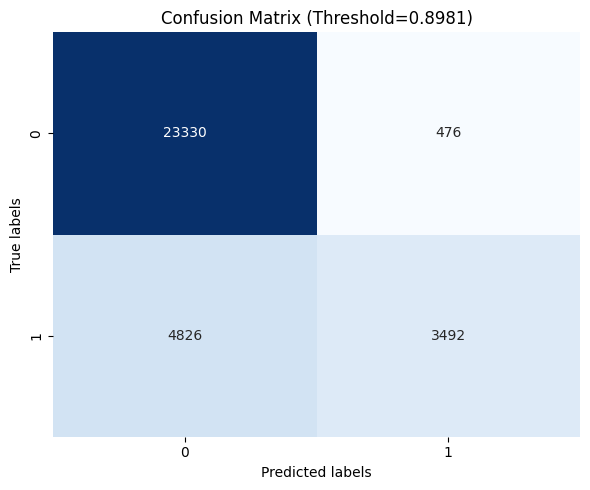

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 14:40:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: f0b1c981c92c448080712f6a37da0db4
View the run in the MLflow UI.


In [12]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, class_weight='balanced')
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="Logistic Regression Base Model"
    )

Starting MLflow Run: Logistic Regression Base Model - Not Class Balanced (02d7de33ef9b4c5a9104630213877d29)
Logged model parameters.
Training the model...


c:\Users\vaseekaranv\AppData\Local\anaconda3\envs\nibm_dl\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:627: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.7425369
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.7425 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8368
Validation Weighted F1-Score: 0.8152
Validation Macro F1-Score: 0.7372
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.4270
Validation Precision Class 0: 0.8304
Validation Precision Class 1: 0.8818

              precision    recall  f1-score   support

           0     0.8304    0.9800    0.8990     23806
           1     0.8818    0.4270    0.5754      8318

    accuracy                         0.8368     32124
   macro avg     0.8561    0.7035    0.7372     32124
weighted avg     0.8437    0.8368    0.8152     32124

Logged validation

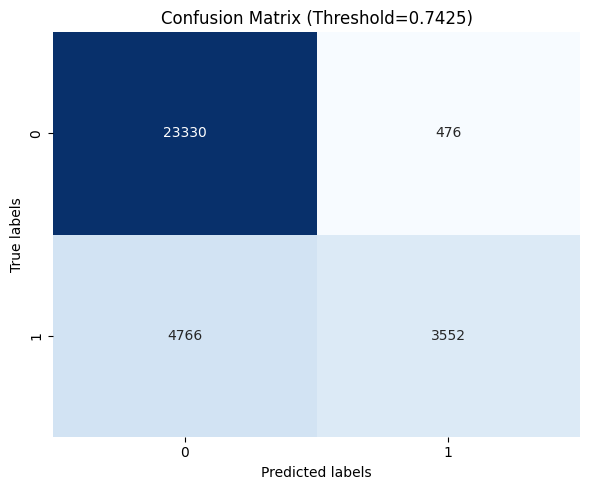

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 14:41:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 02d7de33ef9b4c5a9104630213877d29
View the run in the MLflow UI.


In [13]:
model = LogisticRegression(random_state=0)
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="Logistic Regression Base Model - Not Class Balanced"
    )

Starting MLflow Run: Decision Tree Classifier Base Model (ba9a06030c8d4c66a5e39b6cf91dd575)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Result: Target recall was not achievable.
Using threshold: Custom threshold search failed (target Recall[0] >= 0.9800), using 0.5.
Calculating performance metrics...
Validation Accuracy: 0.8375
Validation Weighted F1-Score: 0.8379
Validation Macro F1-Score: 0.7895
Validation Recall Class 0: 0.8874
Validation Recall Class 1: 0.6948
Validation Precision Class 0: 0.8927
Validation Precision Class 1: 0.6831

              precision    recall  f1-score   support

           0     0.8927    0.8874    0.8900     23806
           1     0.6831    0.6948    0.6889      8318

    accuracy                         0.8375     32124
   macro avg     0.7879    0.791

c:\Users\vaseekaranv\Desktop\NIBM-MSc\FYP\utils\threshold.py:106: UserWarning: Target recall 0.98 for class 0 was not met at any threshold.
  warnings.warn(f"Target recall {target_recall} for class {target_class} was not met at any threshold.")
c:\Users\vaseekaranv\Desktop\NIBM-MSc\FYP\utils\mlflow_ml_model_logger.py:97: UserWarning: Custom threshold search failed (target Recall[0] >= 0.9800), using 0.5.
  warnings.warn(threshold_details)


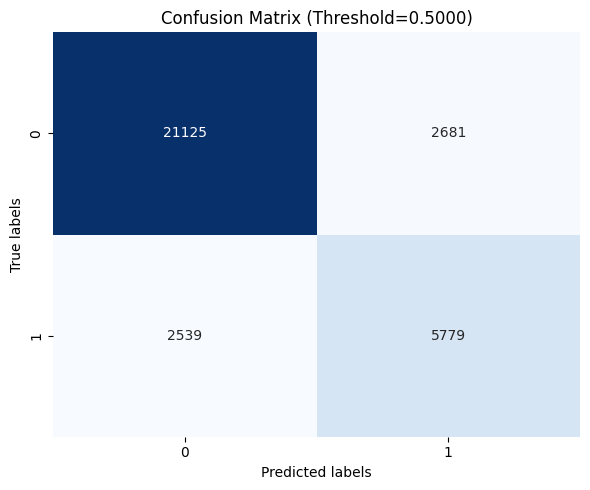

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 15:27:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: ba9a06030c8d4c66a5e39b6cf91dd575
View the run in the MLflow UI.


In [19]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="Decision Tree Classifier Base Model"
    )

Starting MLflow Run: XGBoost Base Model (62d5048f28e44135bdb17a91ca65cd07)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800


c:\Users\vaseekaranv\AppData\Local\anaconda3\envs\nibm_dl\lib\site-packages\xgboost\core.py:158: UserWarning: [14:42:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.7976488
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.7976 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8637
Validation Weighted F1-Score: 0.8506
Validation Macro F1-Score: 0.7914
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5309
Validation Precision Class 0: 0.8567
Validation Precision Class 1: 0.9027

              precision    recall  f1-score   support

           0     0.8567    0.9800    0.9142     23806
           1     0.9027    0.5309    0.6686      8318

    accuracy                         0.8637     32124
   macro avg     0.8797    0.7555    0.7914     32124
weighted avg     0.8686    0.8637    0.8506     32124

Logged validation metrics (rounded to 4 decimals).
Generating Confusion Matrix plot...
Saved Confusion Matrix plot to: confusion_matrix_val.png


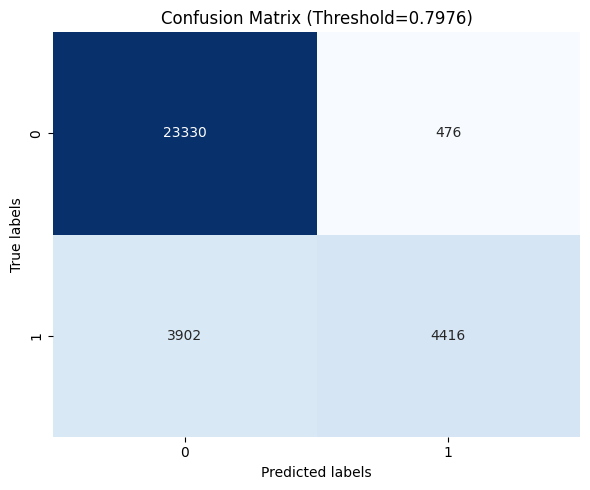

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 14:42:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 62d5048f28e44135bdb17a91ca65cd07
View the run in the MLflow UI.


In [14]:
#XGBoost
from xgboost import XGBClassifier
model = XGBClassifier(random_state=0, tree_method = 'hist', device = 'cuda')
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="XGBoost Base Model"
    )

Starting MLflow Run: CatBoost Base Model (6b27024331ca4004b8af8991c59108de)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.7588621
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.7589 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8701
Validation Weighted F1-Score: 0.8586
Validation Macro F1-Score: 0.8034
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5555
Validation Precision Class 0: 0.8632
Validation Precision Class 1: 0.9066

              precision    recall  f1-score   support

           0     0.8632    0.9800    0.9179     23806
           1     0.9066    0.5555    0.6889      8318

    accuracy                         0.8701     32124
   

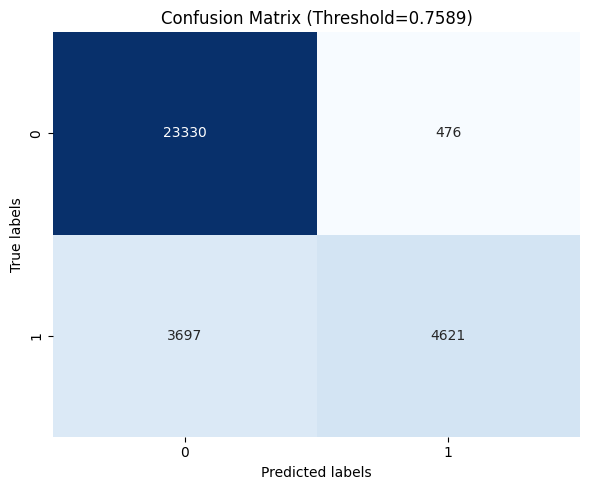

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 14:43:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 6b27024331ca4004b8af8991c59108de
View the run in the MLflow UI.


In [15]:
#CatBoost
from catboost import CatBoostClassifier
model = CatBoostClassifier(random_state=0, task_type='GPU', devices='0:1', verbose = 0)
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="CatBoost Base Model"
    )

Starting MLflow Run: LightGBM Base Model (59a39d028daa4fe3982d7c0f60a4c7f2)
Logged model parameters.
Training the model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 74862, number of negative: 214253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.206134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101943
[LightGBM] [Info] Number of data points in the train set: 289115, number of used features: 425
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258935 -> initscore=-1.051511
[LightGBM] [Info] Start training from score -1.051511
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.7737077
Achieved Recall at Threshold: 0.9800
Using threshol

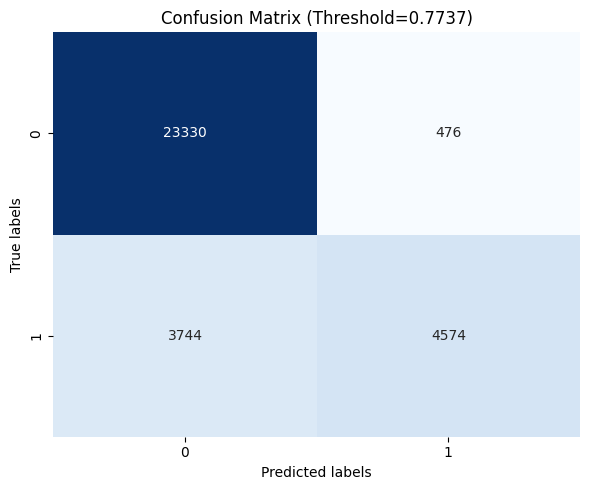

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 14:43:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 59a39d028daa4fe3982d7c0f60a4c7f2
View the run in the MLflow UI.


In [16]:
#LigtGBM
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=0)
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="LightGBM Base Model"
    )

Starting MLflow Run: Random Forest Base Model (3f02946042ac4758b116f8e24ca07beb)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.7100000
Achieved Recall at Threshold: 0.9810
Using threshold: Custom threshold 0.7100 aiming for Recall[0] >= 0.9800 (func achieved 0.9810)
Calculating performance metrics...
Validation Accuracy: 0.8603
Validation Weighted F1-Score: 0.8460
Validation Macro F1-Score: 0.7843
Validation Recall Class 0: 0.9810
Validation Recall Class 1: 0.5149
Validation Precision Class 0: 0.8527
Validation Precision Class 1: 0.9043

              precision    recall  f1-score   support

           0     0.8527    0.9810    0.9123     23806
           1     0.9043    0.5149    0.6562      8318

    accuracy                         0.8603     3212

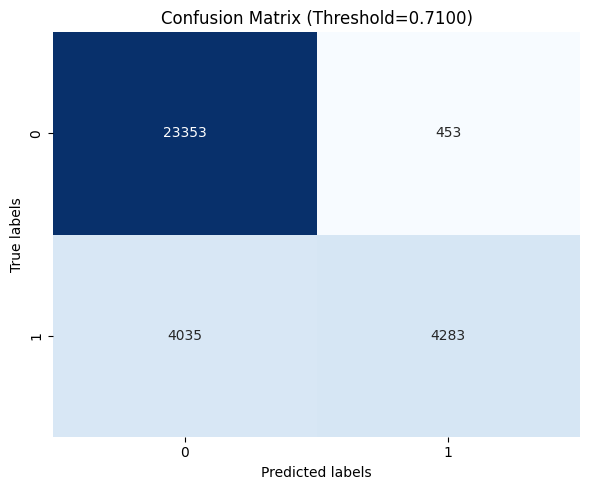

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 14:44:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 3f02946042ac4758b116f8e24ca07beb
View the run in the MLflow UI.


In [17]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="Random Forest Base Model"
    )

Starting MLflow Run: Hist Gradient Boosting Base Model (a4aefc1af2164ba09b7ce0ad4ebbebda)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.7753919
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.7754 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8682
Validation Weighted F1-Score: 0.8562
Validation Macro F1-Score: 0.7998
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5481
Validation Precision Class 0: 0.8612
Validation Precision Class 1: 0.9055

              precision    recall  f1-score   support

           0     0.8612    0.9800    0.9168     23806
           1     0.9055    0.5481    0.6828      8318

    accuracy                         0.8682

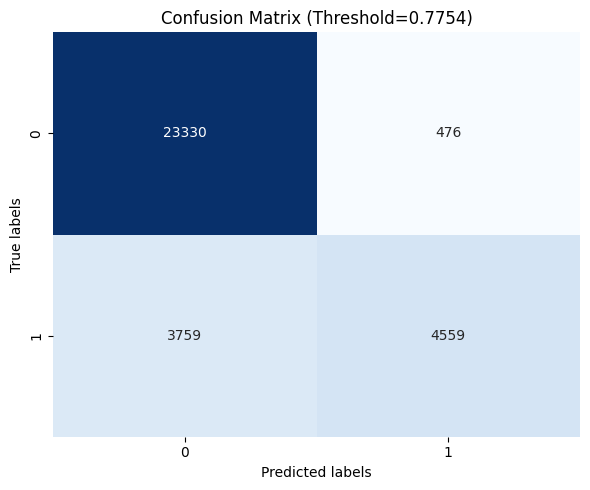

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 16:19:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: a4aefc1af2164ba09b7ce0ad4ebbebda
View the run in the MLflow UI.


In [21]:
#Gradient Boosting
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(random_state=0)
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="Hist Gradient Boosting Base Model"
    )

In [24]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [25]:
model = TabNetClassifier(
    # n_d=8, n_a=8, # Size of decision/attention prediction layers (defaults are often fine)
    # n_steps=3, # Number of decision steps (defaults are often fine)
    # gamma=1.3, # Coefficient for feature reusage penalty
    # cat_idxs=cat_idxs, # List of categorical feature indices
    # cat_dims=cat_dims, # List of cardinalities for categorical features
    # cat_emb_dim=cat_emb_dim, # List of embedding dimensions for categorical features
    optimizer_fn=torch.optim.Adam, # Or AdamW, etc.
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9}, # Example LR scheduler
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax', # 'sparsemax' or 'entmax'
    verbose=10, # Print training progress every 10 epochs
    device_name='cuda' # Use 'cuda' if GPU is available
)

c:\Users\vaseekaranv\AppData\Local\anaconda3\envs\nibm_dl\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Starting MLflow Run: TabNet Base Model (4cc1baf1c3974f47b67dfcdac19ac921)
Logged model parameters.
Training the model...


c:\Users\vaseekaranv\AppData\Local\anaconda3\envs\nibm_dl\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.32229 |  0:00:13s
epoch 10 | loss: 0.24911 |  0:02:23s
epoch 20 | loss: 0.24479 |  0:04:29s
epoch 30 | loss: 0.23557 |  0:06:36s
epoch 40 | loss: 0.23274 |  0:08:41s
epoch 50 | loss: 0.2285  |  0:10:47s
epoch 60 | loss: 0.22579 |  0:12:51s
epoch 70 | loss: 0.22434 |  0:14:57s
epoch 80 | loss: 0.22308 |  0:17:03s
epoch 90 | loss: 0.22144 |  0:19:07s
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.7363391
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.7363 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8639
Validation Weighted F1-Score: 0.8509
Validation Macro F1-Score: 0.7918
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5316
Validation Precision Class 0: 0.8569
Validation P

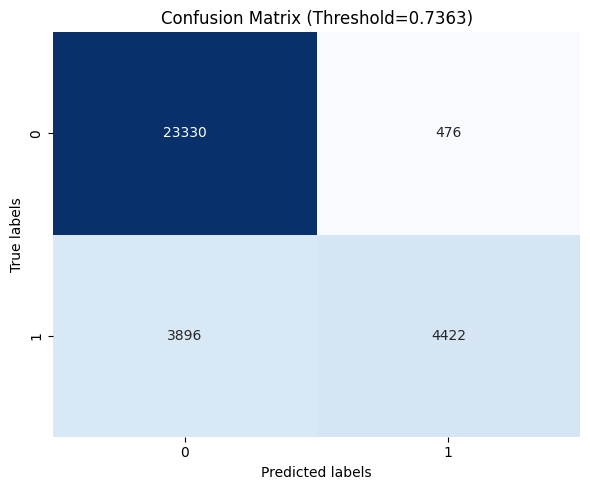

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 16:47:59 WARNING mlflow.utils.requirements_utils: Found torch version (2.4.1+cu118) contains a local version label (+cu118). MLflow logged a pip requirement for this package as 'torch==2.4.1' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/04/16 16:47:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 4cc1baf1c3974f47b67dfcdac19ac921
View the run in the MLflow UI.


In [27]:
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']).values,
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']).values,
        y_val=y_val['target'].values,
        run_name="TabNet Base Model"
    )

Starting MLflow Run: Balanced Random Forest Base Model (53b0fb2f9cb54c2db9170bedd766684b)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.8300000
Achieved Recall at Threshold: 0.9802
Using threshold: Custom threshold 0.8300 aiming for Recall[0] >= 0.9800 (func achieved 0.9802)
Calculating performance metrics...
Validation Accuracy: 0.8535
Validation Weighted F1-Score: 0.8375
Validation Macro F1-Score: 0.7714
Validation Recall Class 0: 0.9802
Validation Recall Class 1: 0.4910
Validation Precision Class 0: 0.8464
Validation Precision Class 1: 0.8964

              precision    recall  f1-score   support

           0     0.8464    0.9802    0.9084     23806
           1     0.8964    0.4910    0.6345      8318

    accuracy                         0.8535

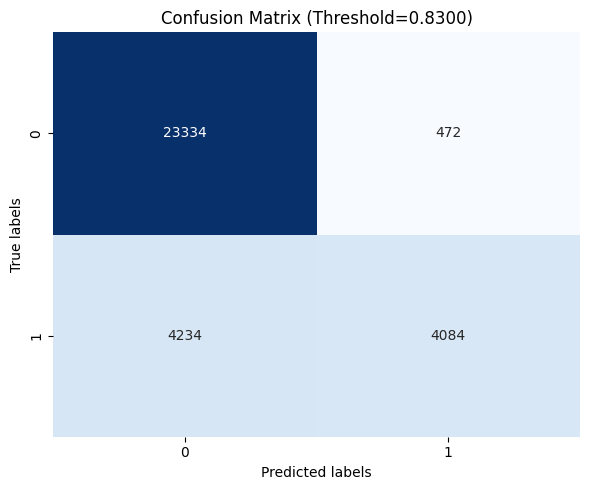

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 16:55:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 53b0fb2f9cb54c2db9170bedd766684b
View the run in the MLflow UI.


In [29]:
#Balanced Random Forest Model
from imblearn.ensemble import BalancedRandomForestClassifier
model = BalancedRandomForestClassifier(random_state=0, n_jobs=-1)
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="Balanced Random Forest Base Model"
    )

Starting MLflow Run: Easy Ensemble + XGBoost Base Model (73fd7f6624424e5f8580a658372c2b93)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.9072713
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.9073 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8704
Validation Weighted F1-Score: 0.8590
Validation Macro F1-Score: 0.8040
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5567
Validation Precision Class 0: 0.8635
Validation Precision Class 1: 0.9068

              precision    recall  f1-score   support

           0     0.8635    0.9800    0.9181     23806
           1     0.9068    0.5567    0.6899      8318

    accuracy                         0.870

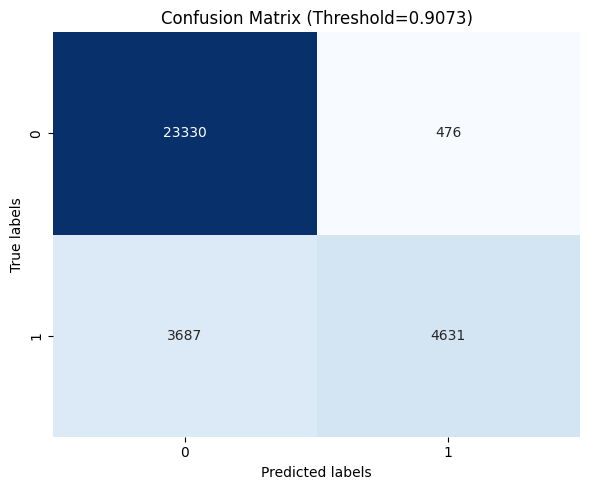

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 17:06:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 73fd7f6624424e5f8580a658372c2b93
View the run in the MLflow UI.


In [31]:
#Easy Ensemble + XGBoost
from imblearn.ensemble import EasyEnsembleClassifier
model = EasyEnsembleClassifier(random_state=0, n_jobs=-1, estimator=XGBClassifier(random_state = 0, tree_method = 'hist', device = 'cuda'))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="Easy Ensemble + XGBoost Base Model"
    )

Starting MLflow Run: Easy Ensemble + LightGBM Base Model (2aa99d1219064f4b87aa8e0884200ee1)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.9040891
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.9041 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8679
Validation Weighted F1-Score: 0.8559
Validation Macro F1-Score: 0.7993
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5470
Validation Precision Class 0: 0.8609
Validation Precision Class 1: 0.9053

              precision    recall  f1-score   support

           0     0.8609    0.9800    0.9166     23806
           1     0.9053    0.5470    0.6820      8318

    accuracy                         0.86

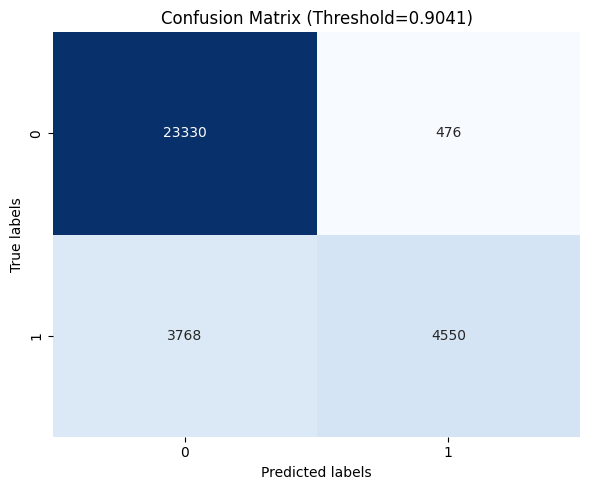

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 17:08:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 2aa99d1219064f4b87aa8e0884200ee1
View the run in the MLflow UI.


In [32]:
# Easy Ensemble + LightGBM
from imblearn.ensemble import EasyEnsembleClassifier
model = EasyEnsembleClassifier(random_state=0, n_jobs=-1, estimator=LGBMClassifier(random_state = 0))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="Easy Ensemble + LightGBM Base Model"
    )

Starting MLflow Run: Easy Ensemble + CatBoost Base Model (5fff4492392e4a5c80015b23cd00a3c9)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.8991960
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.8992 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8709
Validation Weighted F1-Score: 0.8596
Validation Macro F1-Score: 0.8049
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5587
Validation Precision Class 0: 0.8640
Validation Precision Class 1: 0.9071

              precision    recall  f1-score   support

           0     0.8640    0.9800    0.9184     23806
           1     0.9071    0.5587    0.6915      8318

    accuracy                         0.87

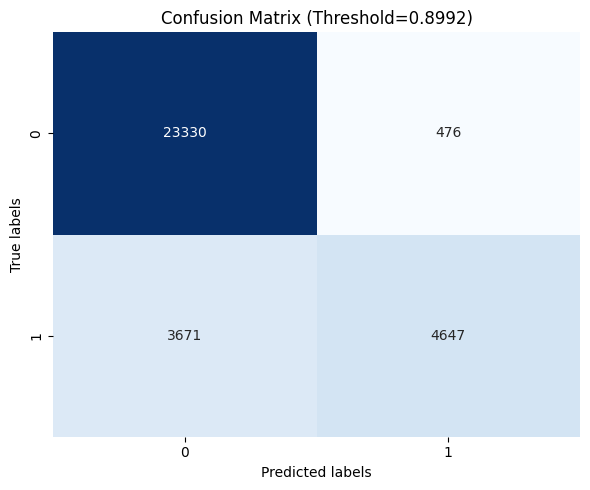

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 17:37:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 5fff4492392e4a5c80015b23cd00a3c9
View the run in the MLflow UI.


In [12]:
# Easy Ensemble + CatBoost
from imblearn.ensemble import EasyEnsembleClassifier
from catboost import CatBoostClassifier
model = EasyEnsembleClassifier(random_state=0, estimator=CatBoostClassifier(random_state=0, task_type='GPU', devices='0:1', verbose = 0))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="Easy Ensemble + CatBoost Base Model"
    )

Starting MLflow Run: Balanced Bagging + XGBoost Base Model (82fcd98b90944d709b0e5b5cfaf9da46)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...


c:\Users\vaseekaranv\AppData\Local\anaconda3\envs\nibm_dl\lib\site-packages\xgboost\core.py:158: UserWarning: [17:39:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.9038606
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.9039 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8689
Validation Weighted F1-Score: 0.8571
Validation Macro F1-Score: 0.8012
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5509
Validation Precision Class 0: 0.8620
Validation Precision Class 1: 0.9059

              precision    recall  f1-score   support

           0     0.8620    0.9800    0.9172     23806
           1     0.9059    0.5509    0.6851      8318

    accuracy                         0.8689     32124
   macro avg     0.8839    0.7654    0.8012     32124
weighted avg     0.8733    0.8689    0.8571     32124

Logged validation metrics (rounded to 4 decimals).
Generating Confusion Matrix plot...
S

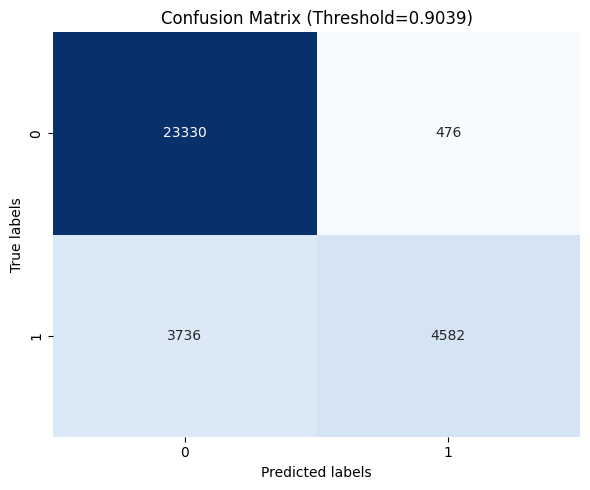

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 17:39:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 82fcd98b90944d709b0e5b5cfaf9da46
View the run in the MLflow UI.


In [14]:
# Balanced Baagging + XGBoost Classifier
from imblearn.ensemble import BalancedBaggingClassifier
from xgboost import XGBClassifier
model = BalancedBaggingClassifier(random_state=0, estimator=XGBClassifier(random_state = 0, tree_method = 'hist', device = 'cuda'))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="Balanced Bagging + XGBoost Base Model"
    )

Starting MLflow Run: Balanced Bagging + LightGBM Base Model (3ea528bffa5a4ca980620e5708188963)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.9018360
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.9018 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8680
Validation Weighted F1-Score: 0.8561
Validation Macro F1-Score: 0.7996
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5476
Validation Precision Class 0: 0.8611
Validation Precision Class 1: 0.9054

              precision    recall  f1-score   support

           0     0.8611    0.9800    0.9167     23806
           1     0.9054    0.5476    0.6824      8318

    accuracy                         0

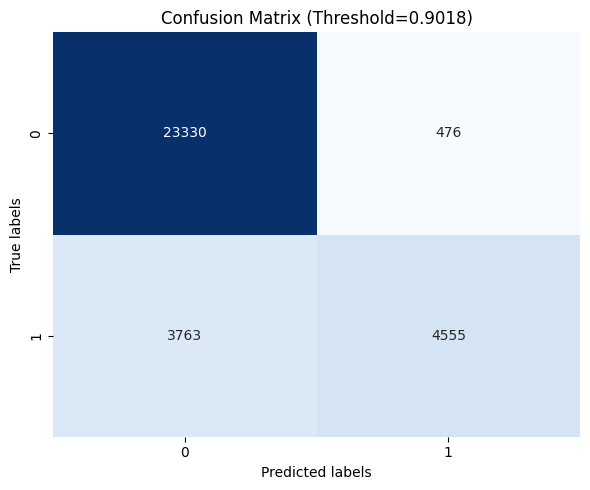

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 17:42:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 3ea528bffa5a4ca980620e5708188963
View the run in the MLflow UI.


In [16]:
# Balanced Baagging + LightGBM Classifier
from lightgbm import LGBMClassifier
model = BalancedBaggingClassifier(random_state=0, estimator=LGBMClassifier(random_state = 0, verbose = 0))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="Balanced Bagging + LightGBM Base Model"
    )

Starting MLflow Run: Balanced Bagging + CatBoost Base Model (b427ac7e0511472b983c86fef750c695)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.8981816
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.8982 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8703
Validation Weighted F1-Score: 0.8588
Validation Macro F1-Score: 0.8037
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5561
Validation Precision Class 0: 0.8634
Validation Precision Class 1: 0.9067

              precision    recall  f1-score   support

           0     0.8634    0.9800    0.9180     23806
           1     0.9067    0.5561    0.6894      8318

    accuracy                         0

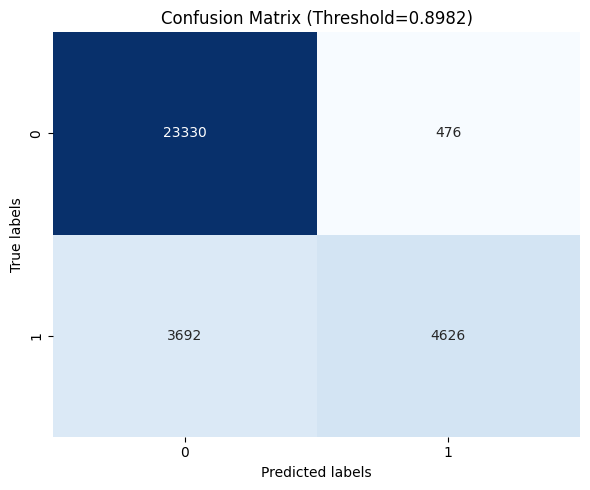

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 17:50:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: b427ac7e0511472b983c86fef750c695
View the run in the MLflow UI.


In [17]:
# Balanced Baagging + CatBoost Classifier
model = BalancedBaggingClassifier(random_state=0, estimator=CatBoostClassifier(random_state=0, task_type='GPU', devices='0:1', verbose = 0))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="Balanced Bagging + CatBoost Base Model"
    )

Starting MLflow Run: RUSBoosting + XGBoost Base Model (1dfc8174be8646978cad5e227f1c8a31)
Logged model parameters.
Training the model...


c:\Users\vaseekaranv\AppData\Local\anaconda3\envs\nibm_dl\lib\site-packages\xgboost\core.py:158: UserWarning: [18:14:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.1192030
Achieved Recall at Threshold: 1.0000
Using threshold: Custom threshold 0.1192 aiming for Recall[0] >= 0.9800 (func achieved 1.0000)
Calculating performance metrics...
Validation Accuracy: 0.7411
Validation Weighted F1-Score: 0.6309
Validation Macro F1-Score: 0.4256
Validation Recall Class 0: 1.0000
Validation Recall Class 1: 0.0000
Validation Precision Class 0: 0.7411
Validation Precision Class 1: 0.0000

              precision    recall  f1-score   support

           0     0.7411    1.0000    0.8513     23806
           1     0.0000    0.0000    0.0000      8318

    accuracy                         0.7411     32124
   macro avg     0.3705    0.5000    0.4256     32124
weighted avg     0.5492    0.7411    0.6309     32124

Logged validation

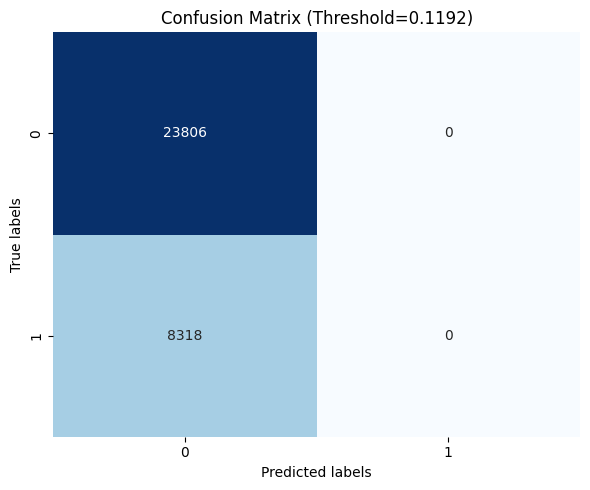

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 18:14:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 1dfc8174be8646978cad5e227f1c8a31
View the run in the MLflow UI.


In [12]:
# RUSBoosting + XGBoost Classifier
from imblearn.ensemble import RUSBoostClassifier
from xgboost import XGBClassifier
model = RUSBoostClassifier(random_state=0, estimator=XGBClassifier(random_state = 0, tree_method = 'hist', device = 'cuda'), n_estimators=10)
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="RUSBoosting + XGBoost Base Model"
    )

Starting MLflow Run: RUSBoosting + LightGBM Base Model (0f2bd1d41eb64e95b4e1f1e51fa3325d)
Logged model parameters.
Training the model...
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.6071149
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.6071 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8402
Validation Weighted F1-Score: 0.8199
Validation Macro F1-Score: 0.7445
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.4403
Validation Precision Class 0: 0.8336
Validation Precision Class 1: 0.8850

              precision    recall  f1-score   support

  

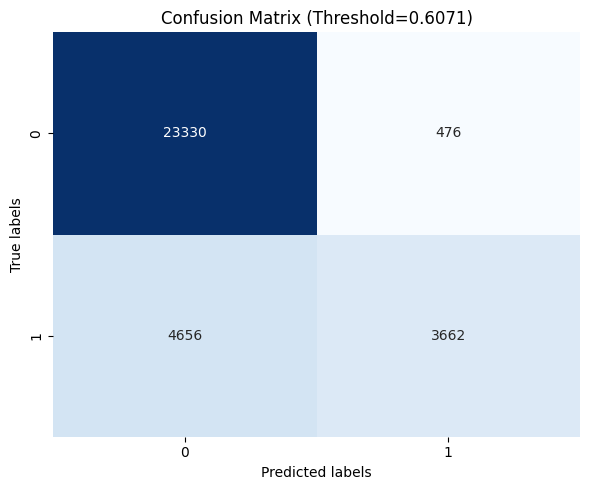

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 18:00:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 0f2bd1d41eb64e95b4e1f1e51fa3325d
View the run in the MLflow UI.


In [19]:
#RUSBoost + LightGBM Classifier
model = RUSBoostClassifier(random_state=0, estimator=LGBMClassifier(random_state = 0, verbose = 0))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="RUSBoosting + LightGBM Base Model"
    )

Starting MLflow Run: RUSBoosting + CatBoost Base Model (46570c99eeb0493f9597e06a4c253fca)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.7692707
Achieved Recall at Threshold: 0.9860
Using threshold: Custom threshold 0.7693 aiming for Recall[0] >= 0.9800 (func achieved 0.9860)
Calculating performance metrics...
Validation Accuracy: 0.8270
Validation Weighted F1-Score: 0.7990
Validation Macro F1-Score: 0.7104
Validation Recall Class 0: 0.9860
Validation Recall Class 1: 0.3717
Validation Precision Class 0: 0.8179
Validation Precision Class 1: 0.9028

              precision    recall  f1-score   support

           0     0.8179    0.9860    0.8941     23806
           1     0.9028    0.3717    0.5266      8318

    accuracy                         0.8270

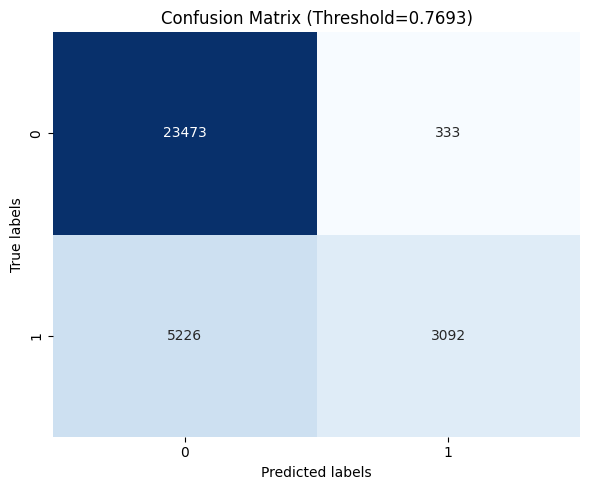

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 18:17:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 46570c99eeb0493f9597e06a4c253fca
View the run in the MLflow UI.


In [14]:
#RUSBoost + CatBoost Classifier
from catboost import CatBoostClassifier
model = RUSBoostClassifier(random_state=0, estimator=CatBoostClassifier(random_state=0, task_type='GPU', devices='0:1', verbose = 0))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="RUSBoosting + CatBoost Base Model",
        
    )

Starting MLflow Run: AdaBoost + XGBoost Base Model (e4c9fbada5da4d528fd61d0587562e72)
Logged model parameters.
Training the model...


c:\Users\vaseekaranv\AppData\Local\anaconda3\envs\nibm_dl\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.4947426
Achieved Recall at Threshold: 1.0000
Using threshold: Custom threshold 0.4947 aiming for Recall[0] >= 0.9800 (func achieved 1.0000)
Calculating performance metrics...
Validation Accuracy: 0.7411
Validation Weighted F1-Score: 0.6309
Validation Macro F1-Score: 0.4256
Validation Recall Class 0: 1.0000
Validation Recall Class 1: 0.0000
Validation Precision Class 0: 0.7411
Validation Precision Class 1: 0.0000

              precision    recall  f1-score   support

           0     0.7411    1.0000    0.8513     23806
           1     0.0000    0.0000    0.0000      8318

    accuracy                         0.7411     32124
   macro avg     0.3705    0.5000    0.4256     32124
weighted avg     0.5492    0.7411    0.6309     32124

Logged validation

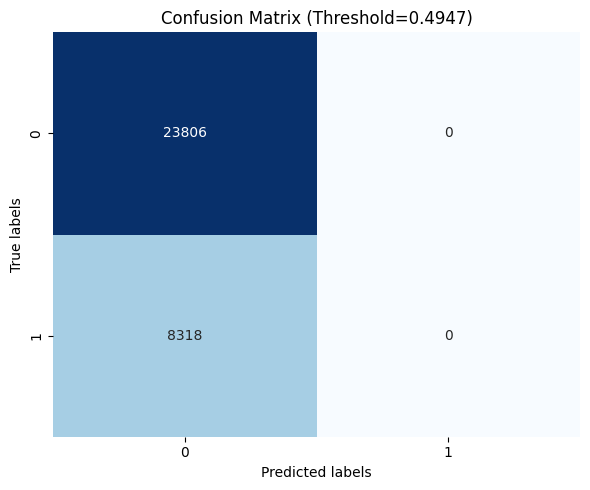

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 18:25:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: e4c9fbada5da4d528fd61d0587562e72
View the run in the MLflow UI.


In [15]:
#AdaBoost + XGBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
model = AdaBoostClassifier(random_state=0, estimator=XGBClassifier(random_state = 0, tree_method = 'hist', device = 'cuda'))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="AdaBoost + XGBoost Base Model"
    )

Starting MLflow Run: AdaBoost + LightGBM Base Model (e37356bb399f47989b3723f7bd19b523)
Logged model parameters.
Training the model...


c:\Users\vaseekaranv\AppData\Local\anaconda3\envs\nibm_dl\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.5165817
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.5166 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8663
Validation Weighted F1-Score: 0.8539
Validation Macro F1-Score: 0.7964
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5410
Validation Precision Class 0: 0.8594
Validation Precision Class 1: 0.9043

              precision    recall  f1-score   support

           0     0.8594    0.9800    0.9157     23806
           1     0.9043    0.5410    0.6770      8318

    accuracy                         0.8663     32124
   macro avg     0.8819    0.7605    0.7964     32124
weighted avg     0.8710    0.8663    0.8539     32124

Logged validation

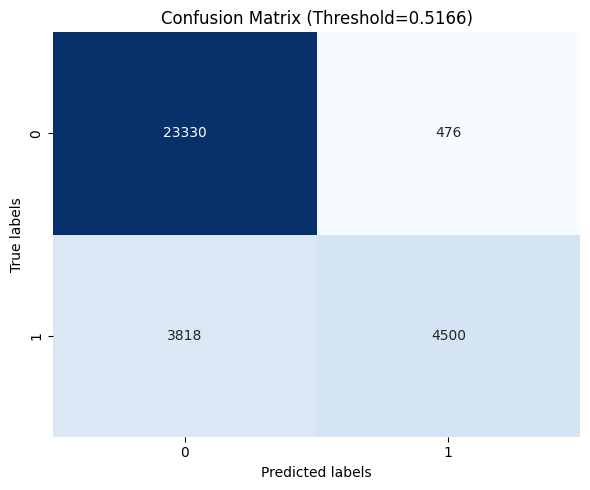

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 18:36:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: e37356bb399f47989b3723f7bd19b523
View the run in the MLflow UI.


In [16]:
#AdaBoost + LightGBM Classifier
from lightgbm import LGBMClassifier
model = AdaBoostClassifier(random_state=0, estimator=LGBMClassifier(random_state = 0, verbose = 0))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="AdaBoost + LightGBM Base Model"
    )

Starting MLflow Run: AdaBoost + CatBoost Base Model (821665ce28924394b388553d538ea3c8)
Logged model parameters.
Training the model...


c:\Users\vaseekaranv\AppData\Local\anaconda3\envs\nibm_dl\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.5057509
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.5058 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8667
Validation Weighted F1-Score: 0.8544
Validation Macro F1-Score: 0.7971
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5426
Validation Precision Class 0: 0.8598
Validation Precision Class 1: 0.9046

              precision    recall  f1-score   support

           0     0.8598    0.9800    0.9160     23806
           1     0.9046    0.5426    0.6783      8318

    accuracy                         0.8667     32124
   macro avg     0.8822    0.7613    0.7971     32124
weighted avg     0.8714    0.8667    0.8544     32124

Logged validation

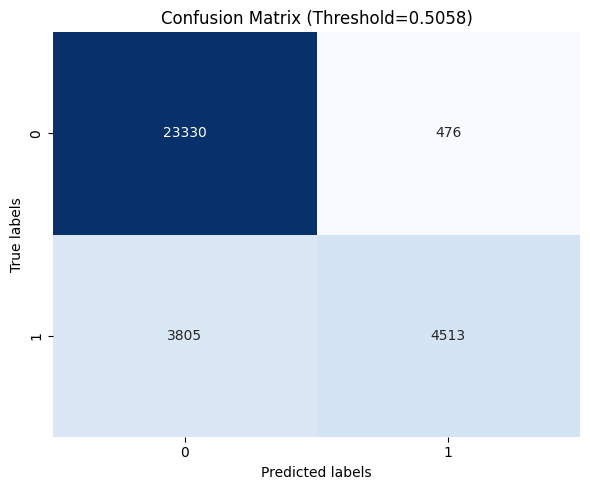

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/16 18:48:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 821665ce28924394b388553d538ea3c8
View the run in the MLflow UI.


In [17]:
#AdaBoost + CatBoost Classifier
from catboost import CatBoostClassifier
model = AdaBoostClassifier(random_state=0, estimator=CatBoostClassifier(random_state=0, task_type='GPU', devices='0:1', verbose = 0))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=val_df.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="AdaBoost + CatBoost Base Model"
    )